In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# CONJUNTO DE DATOS IRIS

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X=iris.drop('species',axis=1)
y=iris['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
#Arreglo para guardar los scores
Scoreiris_GaussianNB_norm = []

# Realizmos el número de pliegues
kf = KFold(n_splits=5)

#Declaramos el modelo de Naive Bayes
model = GaussianNB()

for train_index, test_index in kf.split(X_train_iris):
    X_train2, X_test2 = X_train_iris.iloc[train_index], X_train_iris.iloc[test_index]
    y_train2, y_test2 = y_train_iris.iloc[train_index], y_train_iris.iloc[test_index]
    

    model.fit(X_train2, y_train2)
    
 
    y_pred = model.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)
    Scoreiris_GaussianNB_norm.append(score)


In [5]:
print(Scoreiris_GaussianNB_norm)
media_norm_iris = np.mean(Scoreiris_GaussianNB_norm)
media_norm_iris

[0.8571428571428571, 0.9523809523809523, 1.0, 1.0, 0.9047619047619048]


0.9428571428571428

In [6]:
Score_iris_GaussianNB_multi = []
model2 = MultinomialNB()

for train_index, test_index in kf.split(X_train_iris):
    X_train2, X_test2 = X_train_iris.iloc[train_index], X_train_iris.iloc[test_index]
    y_train2, y_test2 = y_train_iris.iloc[train_index], y_train_iris.iloc[test_index]
    
    # Entrenar el modelo
    model2.fit(X_train2, y_train2)
    
    # Predecir y evaluar
    y_pred = model2.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)
    Score_iris_GaussianNB_multi.append(score)




In [7]:
print(Score_iris_GaussianNB_multi)
media_multi_iris = np.mean(Score_iris_GaussianNB_multi)
media_multi_iris

[0.5714285714285714, 0.7142857142857143, 0.9523809523809523, 0.6666666666666666, 0.5714285714285714]


0.6952380952380952

In [8]:
if media_norm_iris > media_multi_iris:
    print(1)
    model.fit(X_test_iris, y_test_iris)
    y_iris=model.predict(X_test_iris)
elif media_norm_iris == media_multi_iris:
    print(2)
    model2.fit(X_test_iris, y_test_iris)
    y_iris=model2.predict(X_test_iris)
else:
    print(3)
    model2.fit(X_test_iris, y_test_iris)
    y_iris=model2.predict(X_test_iris)

1


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



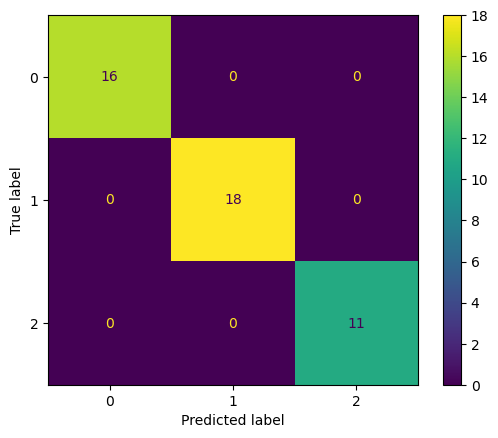

In [9]:
print(classification_report(y_test_iris, y_iris))
cm_iris = confusion_matrix(y_test_iris, y_iris)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_iris)
disp.plot()

# CONJUNTO DE DATOS EMAILS

## Crear data frame

In [10]:
emails = pd.read_csv('emails.csv')
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [11]:
X = emails.drop(['Email No.','Prediction'], axis=1)
y = emails['Prediction']

X_train_emails, X_test_emails, y_train_emails, y_test_emails = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
X_train_emails, X_test_emails, y_train_emails, y_test_emails = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
Score_gaussianNB = []
kf = KFold(n_splits=5)
model = GaussianNB()
for train_index, test_index in kf.split(X_train_emails):
    X_train2, X_test2 = X_train_emails.iloc[train_index], X_train_emails.iloc[test_index]
    y_train2, y_test2 = y_train_emails.iloc[train_index], y_train_emails.iloc[test_index]
    model.fit(X_train2, y_train2)
    y_pred = model.predict(X_test2)
    Score_gaussianNB.append(accuracy_score(y_test2, y_pred))

In [14]:
print(Score_gaussianNB)
media_norm = np.mean(Score_gaussianNB)
media_norm

[0.9475138121546961, 0.9571823204419889, 0.9502762430939227, 0.9516574585635359, 0.9447513812154696]


0.9502762430939227

In [15]:
Score_GaussianNB_multi = []
model2 = MultinomialNB()

for train_index, test_index in kf.split(X_train_emails):
    X_train2, X_test2 = X_train_emails.iloc[train_index], X_train_emails.iloc[test_index]
    y_train2, y_test2 = y_train_emails.iloc[train_index], y_train_emails.iloc[test_index]
    
    # Entrenar el modelo
    model2.fit(X_train2, y_train2)
    
    # Predecir y evaluar
    y_pred = model2.predict(X_test2)
    score = accuracy_score(y_test2, y_pred)
    Score_GaussianNB_multi.append(score)


In [16]:
print(Score_GaussianNB_multi)
media_multi = np.mean(Score_GaussianNB_multi)
media_multi

[0.9516574585635359, 0.9447513812154696, 0.9433701657458563, 0.9461325966850829, 0.9433701657458563]


0.9458563535911602

In [17]:
if media_norm > media_multi:
    print(1)
    model.fit(X_train_emails, y_train_emails)
    y_email=model.predict(X_test_emails)
elif media_norm == media_multi:
    print(2)
    model2.fit(X_train_emails, y_train_emails)
    y_email=model2.predict(X_test_emails)
else:
    print(3)
    model2.fit(X_train_emails, y_train_emails)
    y_email=model2.predict(X_test_emails)

1


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



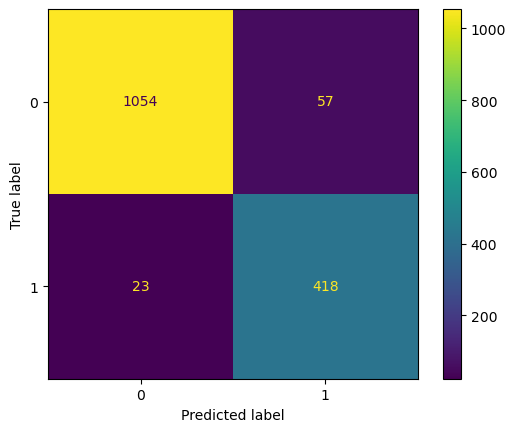

In [18]:
print(classification_report(y_test_emails, y_email))
cm_email = confusion_matrix(y_test_emails, y_email)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_email)
disp.plot()

# IMPRIMIR RESULTADOS

Resultados para Iris

GaussianNB Fold 0 Accuracy: 0.8571
GaussianNB Fold 1 Accuracy: 0.9524
GaussianNB Fold 2 Accuracy: 1.0
GaussianNB Fold 3 Accuracy: 1.0
GaussianNB Fold 4 Accuracy: 0.9048
GaussianNB Promedio Accuracy: 0.9429

MultinomialNB Fold 0 Accuracy: 0.5714
MultinomialNB Fold 1 Accuracy: 0.7143
MultinomialNB Fold 2 Accuracy: 0.9524
MultinomialNB Fold 3 Accuracy: 0.6667
MultinomialNB Fold 4 Accuracy: 0.5714
MultinomialNB Promedio Accuracy: 0.6952

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Modelo utilizado para Iris: GaussianNB
Iris Accuracy: 1.0



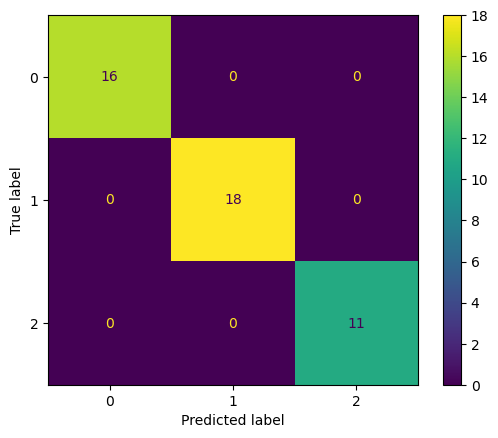

In [19]:
print('Resultados para Iris\n')

for i in range(len(Scoreiris_GaussianNB_norm)):
    print('GaussianNB Fold ' + str(i) +' Accuracy: '+str(round(Scoreiris_GaussianNB_norm[i],4)))
print('GaussianNB Promedio Accuracy: '+str(round(media_norm_iris,4))+'\n')

for i in range(len(Score_iris_GaussianNB_multi)):
    print('MultinomialNB Fold ' + str(i) +' Accuracy: '+str(round(Score_iris_GaussianNB_multi[i],4)))
print('MultinomialNB Promedio Accuracy: '+str(round(media_multi_iris,4))+ '\n')

print(classification_report(y_test_iris, y_iris))

cm_iris = confusion_matrix(y_test_iris, y_iris)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_iris)

if media_norm_iris > media_multi_iris:
    print('Modelo utilizado para Iris: GaussianNB')
else:
    print('Modelo utilizado para Iris: MultinomialNB')
print('Iris Accuracy: '+str(round(accuracy_score(y_test_iris, y_iris),4))+'\n')
disp.plot()

Resultados para Emails

GaussianNB Fold 0 Accuracy: 0.9475
GaussianNB Fold 1 Accuracy: 0.9572
GaussianNB Fold 2 Accuracy: 0.9503
GaussianNB Fold 3 Accuracy: 0.9517
GaussianNB Fold 4 Accuracy: 0.9448
GaussianNB Promedio Accuracy: 0.9503

MultinomialNB Fold 0 Accuracy: 0.9517
MultinomialNB Fold 1 Accuracy: 0.9448
MultinomialNB Fold 2 Accuracy: 0.9434
MultinomialNB Fold 3 Accuracy: 0.9461
MultinomialNB Fold 4 Accuracy: 0.9434
MultinomialNB Promedio Accuracy: 0.9459

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552

Modelo utilizado para Emails: GaussianNB
Emails Accuracy: 0.9485


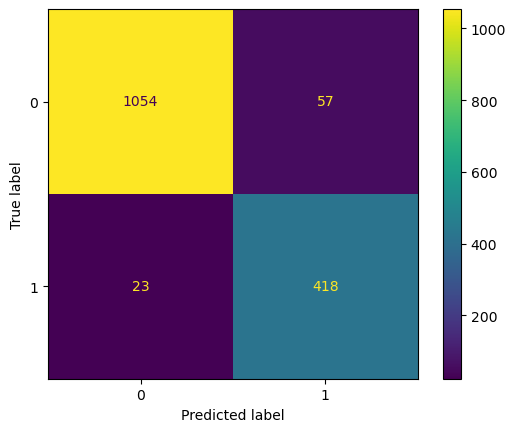

In [20]:
print('Resultados para Emails\n')
for i in range(len(Score_gaussianNB)):
    print('GaussianNB Fold ' + str(i) +' Accuracy: '+str(round(Score_gaussianNB[i],4)))
print('GaussianNB Promedio Accuracy: '+str(round(media_norm,4))+'\n')

for i in range(len(Score_GaussianNB_multi)):
    print('MultinomialNB Fold ' + str(i) +' Accuracy: '+str(round(Score_GaussianNB_multi[i],4)))
print('MultinomialNB Promedio Accuracy: '+str(round(media_multi,4))+'\n')

print(classification_report(y_test_emails, y_email))
cm_email = confusion_matrix(y_test_emails, y_email)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_email)

if media_norm > media_multi:
    print('Modelo utilizado para Emails: GaussianNB')
else:
    print('Modelo utilizado para Emails: MultinomialNB')
print('Emails Accuracy: '+str(round(accuracy_score(y_test_emails, y_email),4)))
disp.plot()